In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import runpy

result = runpy.run_path('datasorting_orientation.py')

In [2]:
val_cat = result['val_cat']
data_cat = result['data_cat']
del result

In [3]:
# preprocessing
data_total = []
for a in range(8): # orientation
    temp = np.array(data_cat).T[a]
    t_temp = []
    for data_num in range(np.shape(data_cat)[0]):
        temp2 = np.mean(temp[0],axis=0)
        t_temp.append(temp2)
        
    data_total.append(t_temp)

In [4]:
# smothing

from filter_matrix import filter_matrix

data_cat_sm = []
for angle in range(8):
    temp_cat = [];
    for n in range(np.shape(data_cat)[0]):
        z = data_cat[n][angle]
        zf = filter_matrix(z,2)
        temp_cat.append(np.mean(zf,axis=0))
        
    data_cat_sm.append(temp_cat)

data_cat_sm = np.array(data_cat_sm)

In [5]:
# PCA analysis

from sklearn.decomposition import PCA

PCA_total = {}

# Loop over the orientations (assuming 8 orientations)
for ori in range(8):
    temp_data = data_cat_sm[ori].T  # Transpose to match the MATLAB orientation
    pca = PCA()
    pca.fit(temp_data)  # Perform PCA
    v = pca.components_   # coeff
    p = pca.transform(temp_data).T  # scores
    dd = pca.explained_variance_ratio_   # explained variance

    # Get the explained variance ratio and cumulative sum
    var_explained = np.cumsum(dd) * 100
    
    # Print the variance explained for the first 5 components
    for i in range(5):
        print(f'Dimensions: {i+1}, Variance explained: {var_explained[i]:.2f}%')

    # Find the dimension to reduce to based on cumulative variance explained
    nmode = np.argmax(var_explained > 87.5) + 1  # Adding 1 since indexing is 1-based in MATLAB
    print(f'Dimensions to be reduced: {nmode}')
    
    # Store PCA results for each orientation
    PCA_total[ori] = {'v': pca.components_, 'p': pca.transform(temp_data), 'dd': pca.explained_variance_}

del ori

Dimensions: 1, Variance explained: 65.68%
Dimensions: 2, Variance explained: 75.64%
Dimensions: 3, Variance explained: 80.99%
Dimensions: 4, Variance explained: 85.31%
Dimensions: 5, Variance explained: 88.71%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.05%
Dimensions: 2, Variance explained: 78.73%
Dimensions: 3, Variance explained: 83.99%
Dimensions: 4, Variance explained: 87.57%
Dimensions: 5, Variance explained: 90.69%
Dimensions to be reduced: 4
Dimensions: 1, Variance explained: 57.01%
Dimensions: 2, Variance explained: 76.14%
Dimensions: 3, Variance explained: 82.16%
Dimensions: 4, Variance explained: 86.65%
Dimensions: 5, Variance explained: 89.17%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 58.25%
Dimensions: 2, Variance explained: 76.74%
Dimensions: 3, Variance explained: 82.72%
Dimensions: 4, Variance explained: 87.21%
Dimensions: 5, Variance explained: 89.41%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 62.37%
Dimens

In [6]:
# PCA to PCA

pca_data = []
for a in range(8):
    temp = PCA_total[a]['p']
    temp = temp[:,:4]
    pca_data.append(temp)

pca_data = np.array(pca_data)
pca_data = np.concatenate(pca_data, axis = 1)

Dimensions: 1, Variance explained: 68.91%
Dimensions: 2, Variance explained: 85.35%
Dimensions: 3, Variance explained: 93.44%
Dimensions: 4, Variance explained: 98.04%
Dimensions: 5, Variance explained: 98.67%
Dimensions to be reduced: 4


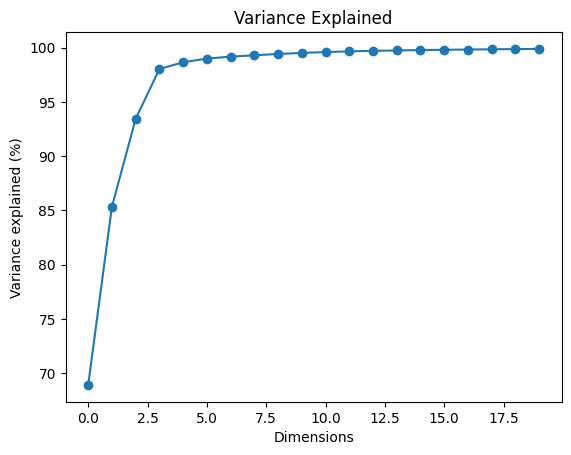

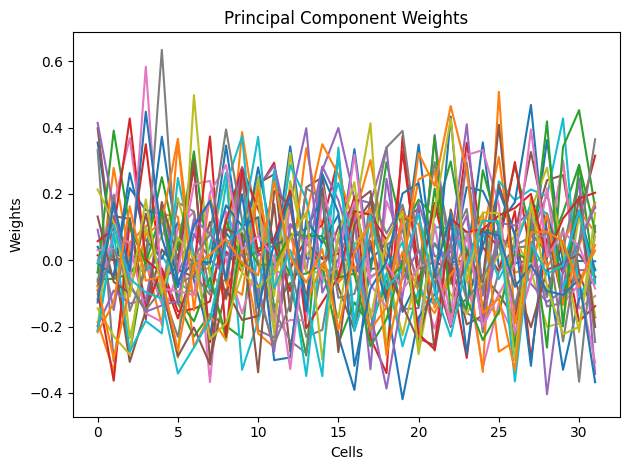

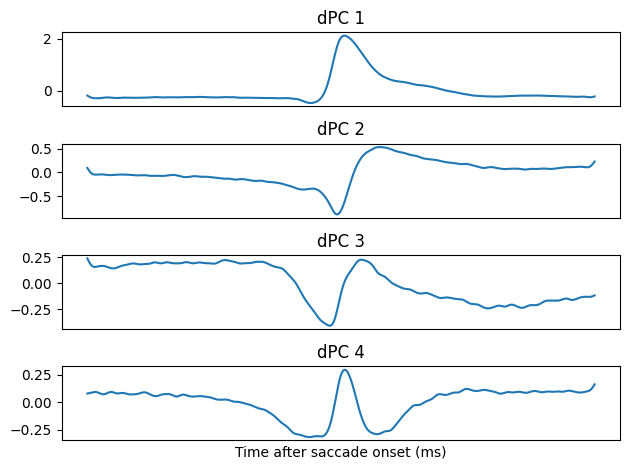

In [7]:
# PCA analysis2

PCA_total2 = {}

# Loop over the orientations (assuming 8 orientations)
# for ori in range(pca_data.shape[1]):

temp_data = pca_data  # Transpose to match the MATLAB orientation
pca = PCA()
pca.fit(temp_data)  # Perform PCA
v = pca.components_   # coeff
p = pca.transform(temp_data).T  # scores
dd = pca.explained_variance_ratio_   # explained variance

# Get the explained variance ratio and cumulative sum
var_explained = np.cumsum(dd) * 100

# Print the variance explained for the first 5 components
for i in range(5):
    print(f'Dimensions: {i+1}, Variance explained: {var_explained[i]:.2f}%')

# Find the dimension to reduce to based on cumulative variance explained
nmode = np.argmax(var_explained > 95) + 1  # Adding 1 since indexing is 1-based in MATLAB
print(f'Dimensions to be reduced: {nmode}')

# Store PCA results for each orientation
PCA_total2 = {'v': pca.components_, 'p': pca.transform(temp_data), 'dd': pca.explained_variance_}


# Plot variance explained
plt.figure()
plt.plot(var_explained[:20], 'o-', label="Cumulative variance explained")
plt.xlabel('Dimensions')
plt.ylabel('Variance explained (%)')
plt.title('Variance Explained')

# plt.savefig('var_ex.jpg', dpi=300)
plt.show()

# Plot the principal component weights (the eigenvectors)
plt.figure()
plt.plot(v.T)  # The components are in rows, so transpose for plotting
plt.xlabel('Cells')
plt.ylabel('Weights')
plt.title('Principal Component Weights')
plt.tight_layout()

# plt.savefig('pc_weight.jpg', dpi=300)
plt.show()

# Plot the principal component time series (scores)
plt.figure()
# hx = []
for i in range(min(nmode, 4)):  # Plot the first 4 components or up to nmode
    ax = plt.subplot(4, 1, i + 1)
    # hx.append(ax)
    ax.plot(np.arange(-300, 300), p[i, :600])  # Assuming 600 time steps
    ax.set_title(f'dPC {i + 1}')
    ax.axis('tight')
    ax.get_xaxis().set_ticks([])
plt.xlabel('Time after saccade onset (ms)')
plt.tight_layout()

# plt.savefig('pc.jpg', dpi=300)
plt.show()

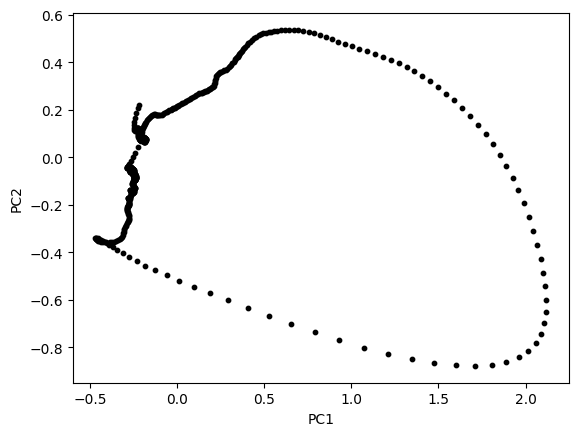

In [8]:
# Plotting

from scipy.ndimage import gaussian_filter1d

win = 1 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms
 
plt.figure()
temp_PC = PCA_total2['p'].T

s_temp1 = gaussian_filter1d(temp_PC[0], win)
s_temp2 = gaussian_filter1d(temp_PC[1], win)
s_temp3 = gaussian_filter1d(temp_PC[2], win)

X = s_temp1[0:600]
Y = s_temp2[0:600]
Z = s_temp3[0:600]

plt.scatter(X, Y, s=10, color = [0, 0, 0], marker='o')

plt.xlabel('PC1')
plt.ylabel('PC2')
# zlabel('PC3')

plt.rc('font', size=15)

# plt.savefig('fig1.jpg', dpi=300)
plt.show()



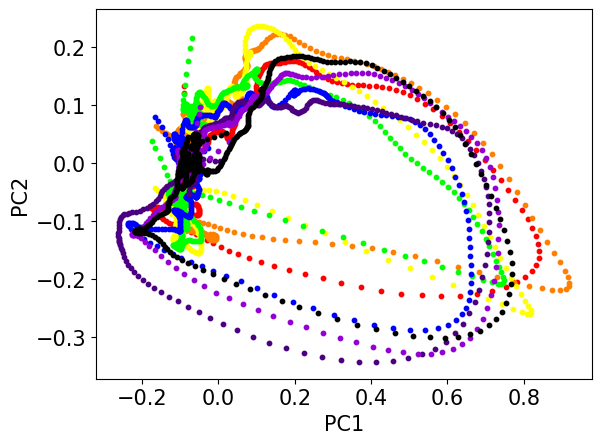

In [9]:
# Plotting

from scipy.ndimage import gaussian_filter1d

win = 1 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms

# rainbow color
color = np.array([255, 0, 0,
                 255, 127, 0,
                 255, 255, 0,
                 0, 255, 0,
                 0, 0, 255,
                 75, 0, 130,
                 148, 0, 211,
                 0, 0, 0])
color = color / 255

# for a in range(8):
#     t_color = [1, 0+1/9*a, 0+1/9*a]
#     color.append(t_color)
    
color = color.reshape(8,3)


plt.figure()
for ori in range(8):
   
    temp_PC = PCA_total[ori]['p'].T
    
    s_temp1 = gaussian_filter1d(temp_PC[0], win)
    s_temp2 = gaussian_filter1d(temp_PC[1], win)
    s_temp3 = gaussian_filter1d(temp_PC[2], win)

    X = s_temp1[0:600]
    Y = s_temp2[0:600]
    Z = s_temp3[0:600]

    plt.scatter(X, Y, s=10, color=color[ori], marker='o')
    # plt.plot(X, Y, linewidth=2.0, color=color[ori])
    # plt.scatter(X[0], Y[0], s=400, color=color[ori], facecolors='none')
    # plt.scatter(X[300], Y[300], marker=CARETUP, s=200, color = [0, 0, 0], facecolor = color[ori])
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    # zlabel('PC3')

plt.rc('font', size=15)
    
# plt.savefig('fig2.jpg', dpi=300)
plt.show()

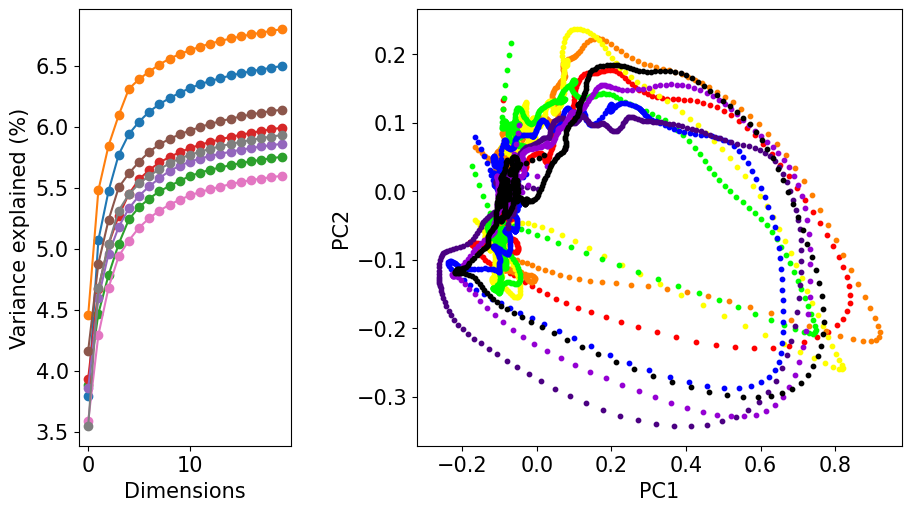

In [10]:
# Pretty figures1
fig = plt.figure(constrained_layout=True,figsize=(9,5))
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[2, 4])

#pca
subfigs[1].subplots(1, 1)
for ori in range(8):
   
    temp_PC = PCA_total[ori]['p'].T
    
    s_temp1 = gaussian_filter1d(temp_PC[0], win)
    s_temp2 = gaussian_filter1d(temp_PC[1], win)
    s_temp3 = gaussian_filter1d(temp_PC[2], win)

    X = s_temp1[0:600]
    Y = s_temp2[0:600]
    Z = s_temp3[0:600]

    plt.scatter(X, Y, s=10, color=color[ori], marker='o')
    # plt.plot(X, Y, linewidth=2.0, color=color[ori])
    # plt.scatter(X[0], Y[0], s=400, color=color[ori], facecolors='none')
    # plt.scatter(X[300], Y[300], marker=CARETUP, s=200, color = [0, 0, 0], facecolor = color[ori])
    
plt.xlabel('PC1')
plt.ylabel('PC2')
    # zlabel('PC3')

#variance explained
subfigs[0].subplots(1, 1)
for ori in [2, 1, 0, 7, 6, 5, 4, 3]: # right to down right, anticlock-wise
    dd = PCA_total[ori]['dd']

    # Get the explained variance ratio and cumulative sum
    var_explained = np.cumsum(dd) * 100

    # Plot variance explained
    plt.plot(var_explained[:20], 'o-', label="Cumulative variance explained")
    plt.xlabel('Dimensions')
    plt.ylabel('Variance explained (%)')


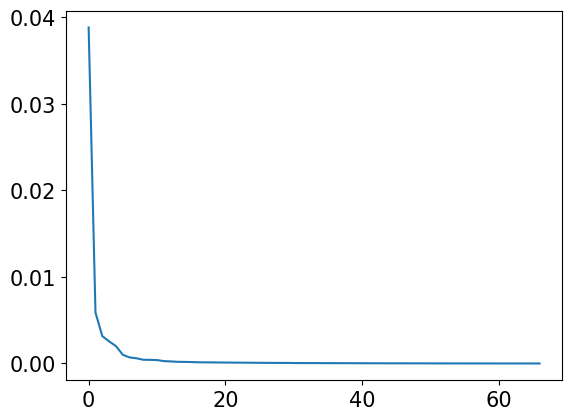

In [68]:
plt.plot(PCA_total[0]['dd'])

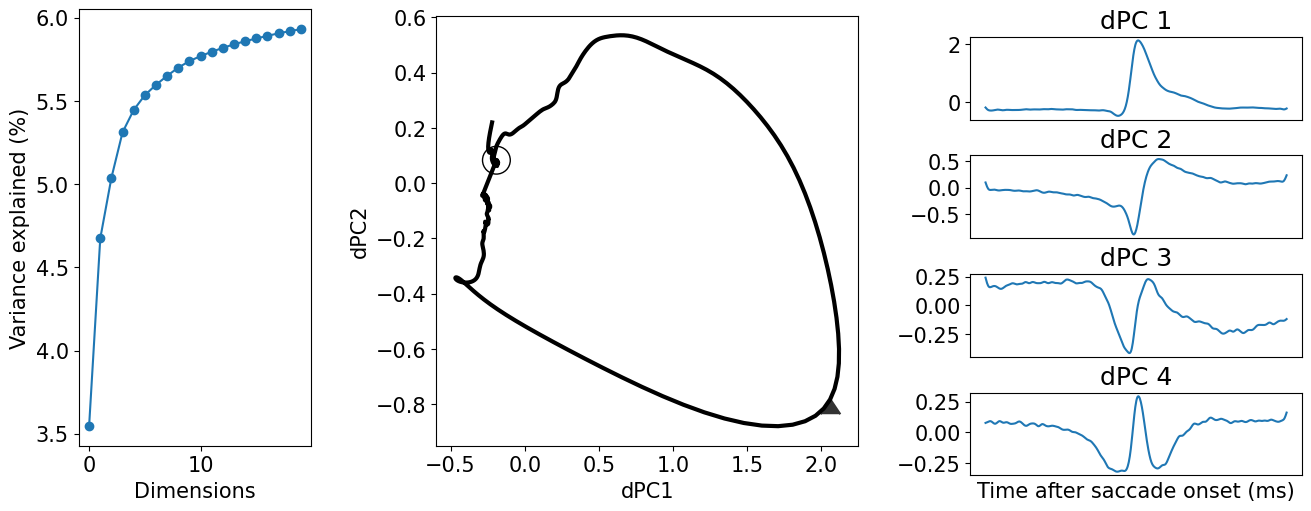

In [87]:
# Pretty figures2
from matplotlib.markers import CARETUP

fig = plt.figure(constrained_layout=True,figsize=(13,5))
subfigs = fig.subfigures(1, 3, wspace=0.07, width_ratios=[3, 5, 4])

# Plot variance explained
subfigs[0].subplots(1, 1)
var_explained = np.cumsum(dd) * 100
plt.plot(var_explained[:20], 'o-')
plt.xlabel('Dimensions')
plt.ylabel('Variance explained (%)')
# plt.title('Variance Explained')

# plt.savefig('var_ex.jpg', dpi=300)
# plt.show()

# plt.savefig('var_ex.jpg', dpi=300)
# plt.show()


# Plot dPCA
subfigs[1].subplots(1, 1)

from scipy.ndimage import gaussian_filter1d

win = 1 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms
 
temp_PC = PCA_total2['p'].T

s_temp1 = gaussian_filter1d(temp_PC[0], win)
s_temp2 = gaussian_filter1d(temp_PC[1], win)
s_temp3 = gaussian_filter1d(temp_PC[2], win)

X = s_temp1[0:600]
Y = s_temp2[0:600]
Z = s_temp3[0:600]

# plt.scatter(X, Y, s=10, color = [0, 0, 0], marker='o')
plt.plot(X, Y, linewidth=3.0, color = [0, 0, 0])
plt.scatter(X[0], Y[0], s=400, color = [0, 0, 0], facecolors='none')
plt.scatter(X[300], Y[300], marker=CARETUP, s=200, color = [0, 0, 0], facecolor = [0.2, 0.2, 0.2])
plt.xlabel('dPC1')
plt.ylabel('dPC2')
# zlabel('PC3')

# plt.rc('font', size=25)

# Plot the principal component time series (scores)
subfigs[2].subplots(4, 1)

for i in range(min(nmode, 4)):  # Plot the first 4 components or up to nmode
    ax = plt.subplot(4, 1, i + 1)
    ax.plot(np.arange(-300, 300), p[i, :600])  # Assuming 600 time steps
    ax.set_title(f'dPC {i + 1}')
    ax.axis('on')
    ax.get_xaxis().set_ticks([])
plt.xlabel('Time after saccade onset (ms)')
# plt.tight_layout()

plt.savefig('pc.jpg', dpi=300)

plt.show()

In [15]:
pca_data = []
for pc in range(4):
    for a in range(8):
        temp = PCA_total[a]['p'].T
        temp = temp[pc]
        pca_data.append(temp)
pca_data = np.array(pca_data)

p = PCA_total2['p'].T

In [12]:
for_corr = np.vstack([pca_data, p])
pval = np.corrcoef(for_corr)

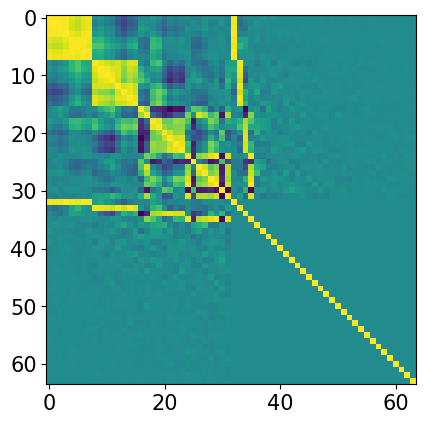

In [13]:
plt.imshow(pval)

In [14]:
c_p1 = pval[32]
c_p2 = pval[33]

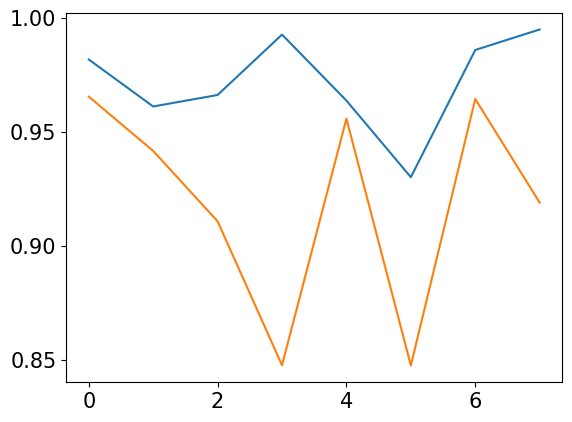

In [15]:
plt.plot(c_p1[:8])
plt.plot(c_p2[8:16])
plt.rc('font', size=20)

# plt.savefig('pca_pca_r.jpg', dpi=300)

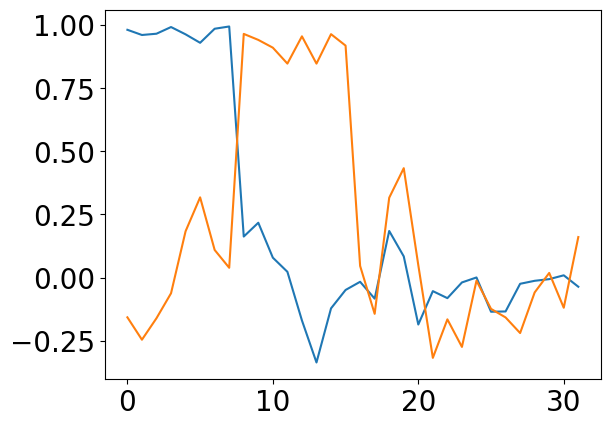

In [16]:
plt.plot(c_p1[:32])
plt.plot(c_p2[:32])


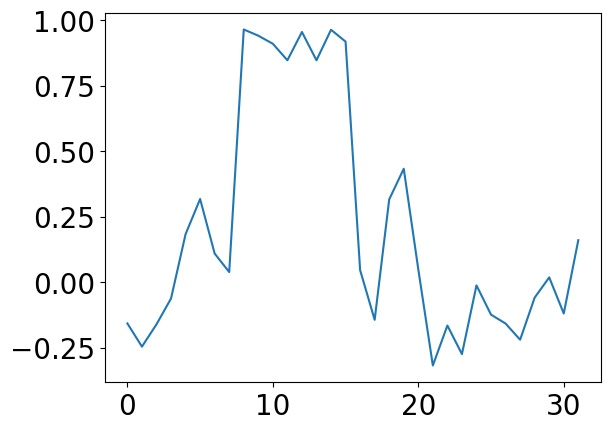

In [17]:
plt.plot(c_p2[:32])

In [18]:
betas1, resid1 = np.linalg.lstsq(pca_data.T, p[0], rcond=None)[:2]
betas2, resid2 = np.linalg.lstsq(pca_data.T, p[1], rcond=None)[:2]

r_s1 = 1 - resid1 / (p[0].size * p[0].var())
r_s2 = 1 - resid2 / (p[1].size * p[1].var())

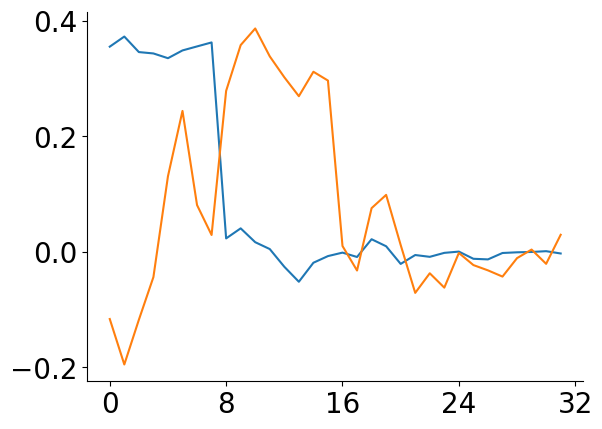

In [19]:
plt.plot(betas1)
plt.plot(betas2)

plt.xticks(range(0,33,8))

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('beta_eachF.jpg', dpi = 300)
# xticks([0, 1, 2], ['January', 'February', 'March'], rotation=20)

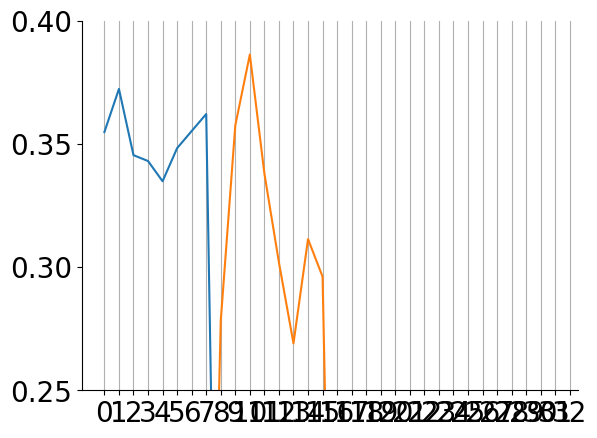

In [20]:
plt.plot(betas1)
plt.plot(betas2)

plt.xticks(range(0,33,1))
plt.ylim([0.25, 0.4])
plt.grid(axis = 'x')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('beta_eachF2.jpg', dpi = 300)

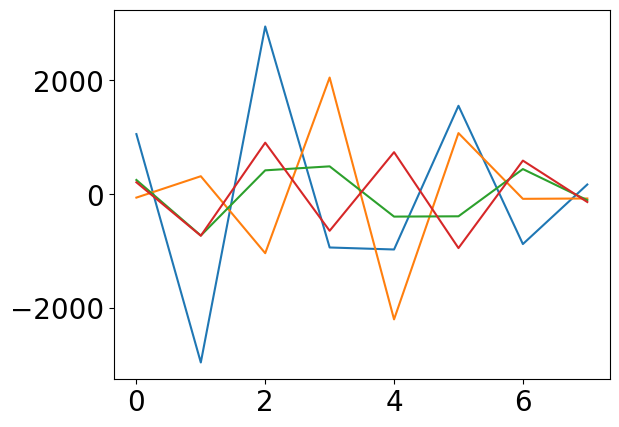

In [21]:
# get betas
betas1 = np.linalg.lstsq(pca_data[:, 0:8], p[:, 0], rcond=None)[0]
betas2 = np.linalg.lstsq(pca_data[:, 8:16], p[:, 1], rcond=None)[0]
betas3 = np.linalg.lstsq(pca_data[:, 16:24], p[:, 2], rcond=None)[0]
betas4 = np.linalg.lstsq(pca_data[:, 24:32], p[:, 3], rcond=None)[0]

# plot
plt.plot(betas1)
plt.plot(betas2)
plt.plot(betas3)
plt.plot(betas4)

plt.savefig('fig3.jpg', dpi=300)

In [22]:
def generate_linear_model(rate_matrix, params, params0):
    """
    Generate a linear model of the rate matrix.

    Parameters:
    - rate_matrix (ndarray): Rate matrix (Trial x Time)
    - params (ndarray): Parameters (peak velocity, duration) shape (Trial x 2)
    - params0 (array-like): Grand average parameters [peak velocity, average velocity]

    Returns:
    - linmod (dict): Linear model structure containing:
        - wv0: reduced model velocity coefficients
        - wv: full model velocity coefficients
        - wr: full model duration coefficients
        - ssc: corrected PSTH for full model
        - ssc0: corrected PSTH for reduced model
        - v00: grand average peak velocity
        - r00: grand average average velocity
    """
    vpeak = np.abs(params[:][0])  # peak velocity
    sdur = np.abs(params[:][1])   # duration
    ss = rate_matrix              # rate matrix

    ss0 = np.nanmean(ss, axis=0)  # mean rate across trials
    dss = ss - ss0                # deviation from mean rate
    v0 = np.nanmean(vpeak)        # mean peak velocity
    r0 = np.nanmean(15. / sdur)   # mean average velocity

    dv = vpeak - v0
    dr = 10. / sdur - r0
    dz = np.stack((dv, dr), axis=1)  # shape (Trial, 2)

    # Full model coefficients
    cc = dz.T @ dz
    w12 = np.linalg.pinv(cc) @ dz.T @ dss  # shape (2, Time)

    wv = w12[0, :]  # velocity coefficients
    wr = w12[1, :]  # duration coefficients

    # Reduced model with only velocity
    wv0 = (dv.T @ dss) / (dv.T @ dv)  # shape (Time,)

    # Grand averages
    v00 = params0[0]
    r00 = params0[1]

    # Corrected PSTH for full model
    wc = (v00 - v0) * wv + (r00 - r0) * wr
    ssc = ss0 + wc

    # Corrected PSTH for reduced model
    wc0 = (v00 - v0) * wv0
    ssc0 = ss0 + wc0

    linmod = {
        'wv0': wv0,
        'wv': wv,
        'wr': wr,
        'ssc': ssc,
        'ssc0': ssc0,
        'v00': v00,
        'r00': r00
    }

    return linmod


In [24]:
p.shape

(32, 600)

In [ ]:
[v,p,~,~,dd,~]=pca(pca_data);

figure;
subplot(1,2,1)
plot(dd, 'o-')
xlabel('Dimensions')
ylabel('Explained varience ratio')

subplot(1,2,2)
plot(100*cumsum(dd(1:20))/sum(dd), 'o-');
xlabel('Dimensions')
ylabel('Variance explained (%)')

figure;
%     for i=1:nmode
for i=1:4;
    hx(i) = subplot(4,1,i);
    plot(-300:300-1, p(:,i))
    if i==3;
        set(gca, 'YDir','reverse')
    end
    axis tight
    box off
end

win=1;

figure

s_temp1=smoothdata(p(:,1),'gaussian',win);
s_temp2=smoothdata(p(:,2),'gaussian',win);
s_temp3=smoothdata(p(:,3),'gaussian',win);
X=s_temp1; Y=s_temp2; Z=s_temp3;
scatter3(X,Y,Z,10, "o");

axis square

xlabel('PC1')
ylabel('PC2')
zlabel('PC3')

%%
close all

pca_data=[];
for pc=1:4;
    for a=1:8;
        temp=PCA_total{a,2};
        temp=temp(:,pc);
        pca_data=[pca_data temp];
    end
end


% get betas
betas1 = pca_data(:,1:8) \ p(:,1);
betas2 = pca_data(:,9:16) \ p(:,2);
betas3 = pca_data(:,17:24) \ p(:,3);
betas4 = pca_data(:,25:32) \ p(:,4);

% plot
plot(betas1)
hold on
plot(betas2)
plot(betas3)
plot(betas4)